In [1]:
# Importando as bibliotecas.
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime
from dateutil.relativedelta import relativedelta
import re
import seaborn as sns
import numpy as np

In [2]:
# Efetuando a leitura do arquivo com os dados e limpando minimamente.
valores_ausentes = ['-']
df = pd.read_csv('employee_data.csv',encoding='latin-1', parse_dates=['DataAdmissao','DataDesligamento',
                                                                      'DataNascimentoFuncionario'], na_values=valores_ausentes)

In [3]:
df.head()

,Mes,Ano,ChaveFuncionario,DataAdmissao,DataDesligamento,ValorSalario,SexoFuncionario,DataNascimentoFuncionario,EstadoCivilFuncionario,GrauInstrucao,FuncionarioSindicalizado,RecebeInsalubridade,RecebePericulosidade,CargaHorariaFuncionario,dias_afast,Max(CodigoDependente),Max(HrsAbsenteismo),NomeCentroCusto
0,jan,2015,101|18,1994-12-12,NaT,2266.39,Masculino,1965-06-13,Casado,Ensino Medio Completo,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,3.0,1.45000,Folha Pgto - Tornão
1,fev,2015,101|18,1994-12-12,NaT,2266.39,Masculino,1965-06-13,Casado,Ensino Medio Completo,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,3.0,NaN,Folha Pgto - Tornão
2,mar,2015,101|18,1994-12-12,NaT,2266.39,Masculino,1965-06-13,Casado,Ensino Medio Completo,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,3.0,1.71667,Folha Pgto - Tornão
3,abr,2015,101|18,1994-12-12,NaT,2266.39,Masculino,1965-06-13,Casado,Ensino Medio Completo,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,3.0,NaN,Folha Pgto - Tornão
4,mai,2015,101|18,1994-12-12,NaT,2491.61,Masculino,1965-06-13,Casado,Ensino Medio Completo,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,3.0,NaN,Folha Pgto - Tornão


In [4]:
df.info(),df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163643 entries, 0 to 163642
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Mes                        163643 non-null  object        
 1   Ano                        163643 non-null  int64         
 2   ChaveFuncionario           163643 non-null  object        
 3   DataAdmissao               163643 non-null  datetime64[ns]
 4   DataDesligamento           63469 non-null   datetime64[ns]
 5   ValorSalario               163643 non-null  float64       
 6   SexoFuncionario            163643 non-null  object        
 7   DataNascimentoFuncionario  163643 non-null  datetime64[ns]
 8   EstadoCivilFuncionario     163643 non-null  object        
 9   GrauInstrucao              163643 non-null  object        
 10  FuncionarioSindicalizado   163643 non-null  object        
 11  RecebeInsalubridade        163643 non-null  object  

(None,
 Index(['Mes', 'Ano', 'ChaveFuncionario', 'DataAdmissao', 'DataDesligamento',
        'ValorSalario', 'SexoFuncionario', 'DataNascimentoFuncionario',
        'EstadoCivilFuncionario', 'GrauInstrucao', 'FuncionarioSindicalizado',
        'RecebeInsalubridade', 'RecebePericulosidade',
        'CargaHorariaFuncionario', 'dias_afast', 'Max(CodigoDependente)',
        'Max(HrsAbsenteismo)', 'NomeCentroCusto'],
       dtype='object'))

In [5]:
# Preparando um dataSet para as análises, com dados somente de 2017 para frente.
# df = df.loc[df.Ano > 2016]

In [6]:
df.head()

,Mes,Ano,ChaveFuncionario,DataAdmissao,DataDesligamento,ValorSalario,SexoFuncionario,DataNascimentoFuncionario,EstadoCivilFuncionario,GrauInstrucao,FuncionarioSindicalizado,RecebeInsalubridade,RecebePericulosidade,CargaHorariaFuncionario,dias_afast,Max(CodigoDependente),Max(HrsAbsenteismo),NomeCentroCusto
0,jan,2015,101|18,1994-12-12,NaT,2266.39,Masculino,1965-06-13,Casado,Ensino Medio Completo,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,3.0,1.45000,Folha Pgto - Tornão
1,fev,2015,101|18,1994-12-12,NaT,2266.39,Masculino,1965-06-13,Casado,Ensino Medio Completo,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,3.0,NaN,Folha Pgto - Tornão
2,mar,2015,101|18,1994-12-12,NaT,2266.39,Masculino,1965-06-13,Casado,Ensino Medio Completo,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,3.0,1.71667,Folha Pgto - Tornão
3,abr,2015,101|18,1994-12-12,NaT,2266.39,Masculino,1965-06-13,Casado,Ensino Medio Completo,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,3.0,NaN,Folha Pgto - Tornão
4,mai,2015,101|18,1994-12-12,NaT,2491.61,Masculino,1965-06-13,Casado,Ensino Medio Completo,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,3.0,NaN,Folha Pgto - Tornão


In [7]:
# Separando 'ChaveFuncionario' em 'Empresa' e 'Id_funcionario'
df[['Empresa','Id_funcionario']] = df.ChaveFuncionario.str.split('|',expand=True)

In [8]:
# Deletando a coluna 'ChaveFuncionario'
#df.drop('ChaveFuncionario',axis=1,inplace=True)

In [9]:
df['idadeFuncionario'] = df.Ano - df.DataNascimentoFuncionario.dt.year
df.head()

,Mes,Ano,ChaveFuncionario,DataAdmissao,DataDesligamento,ValorSalario,SexoFuncionario,DataNascimentoFuncionario,EstadoCivilFuncionario,GrauInstrucao,...,RecebeInsalubridade,RecebePericulosidade,CargaHorariaFuncionario,dias_afast,Max(CodigoDependente),Max(HrsAbsenteismo),NomeCentroCusto,Empresa,Id_funcionario,idadeFuncionario
0,jan,2015,101|18,1994-12-12,NaT,2266.39,Masculino,1965-06-13,Casado,Ensino Medio Completo,...,Não Recebe,Não Recebe,220,NaN,3.0,1.45000,Folha Pgto - Tornão,101,18,50
1,fev,2015,101|18,1994-12-12,NaT,2266.39,Masculino,1965-06-13,Casado,Ensino Medio Completo,...,Não Recebe,Não Recebe,220,NaN,3.0,NaN,Folha Pgto - Tornão,101,18,50
2,mar,2015,101|18,1994-12-12,NaT,2266.39,Masculino,1965-06-13,Casado,Ensino Medio Completo,...,Não Recebe,Não Recebe,220,NaN,3.0,1.71667,Folha Pgto - Tornão,101,18,50
3,abr,2015,101|18,1994-12-12,NaT,2266.39,Masculino,1965-06-13,Casado,Ensino Medio Completo,...,Não Recebe,Não Recebe,220,NaN,3.0,NaN,Folha Pgto - Tornão,101,18,50
4,mai,2015,101|18,1994-12-12,NaT,2491.61,Masculino,1965-06-13,Casado,Ensino Medio Completo,...,Não Recebe,Não Recebe,220,NaN,3.0,NaN,Folha Pgto - Tornão,101,18,50


In [10]:
# Adicionando uma coluna para determinar se o funcionário está 0=Ativo|1=Desligado
df.loc[(df.DataDesligamento.isna() == True), 'Situacao'] = 0 # Situação Ativo.
df.loc[(df.DataDesligamento.isna() != True), 'Situacao'] = 1 # Situação Desligado.

In [11]:
df.loc[df.ChaveFuncionario == '101|118']

,Mes,Ano,ChaveFuncionario,DataAdmissao,DataDesligamento,ValorSalario,SexoFuncionario,DataNascimentoFuncionario,EstadoCivilFuncionario,GrauInstrucao,...,RecebePericulosidade,CargaHorariaFuncionario,dias_afast,Max(CodigoDependente),Max(HrsAbsenteismo),NomeCentroCusto,Empresa,Id_funcionario,idadeFuncionario,Situacao
636,jan,2015,101|118,1994-08-15,2017-02-10,1411.08,Masculino,1976-01-01,Solteiro,Ensino Medio Completo,...,Não Recebe,180,NaN,NaN,NaN,Folha Pgto - Descascadores,101,118,39,1.0
637,fev,2015,101|118,1994-08-15,2017-02-10,1411.08,Masculino,1976-01-01,Solteiro,Ensino Medio Completo,...,Não Recebe,180,NaN,NaN,0.00000,Folha Pgto - Descascadores,101,118,39,1.0
638,mar,2015,101|118,1994-08-15,2017-02-10,1411.08,Masculino,1976-01-01,Solteiro,Ensino Medio Completo,...,Não Recebe,180,NaN,NaN,0.00000,Folha Pgto - Descascadores,101,118,39,1.0
639,abr,2015,101|118,1994-08-15,2017-02-10,1411.08,Masculino,1976-01-01,Solteiro,Ensino Medio Completo,...,Não Recebe,180,NaN,NaN,2.25000,Folha Pgto - Descascadores,101,118,39,1.0
640,mai,2015,101|118,1994-08-15,2017-02-10,1551.30,Masculino,1976-01-01,Solteiro,Ensino Medio Completo,...,Não Recebe,180,NaN,NaN,0.00000,Folha Pgto - Descascadores,101,118,39,1.0
641,jun,2015,101|118,1994-08-15,2017-02-10,1551.30,Masculino,1976-01-01,Solteiro,Ensino Medio Completo,...,Não Recebe,180,NaN,NaN,0.00000,Folha Pgto - Descascadores,101,118,39,1.0
642,jul,2015,101|118,1994-08-15,2017-02-10,1551.30,Masculino,1976-01-01,Solteiro,Ensino Medio Completo,...,Não Recebe,180,NaN,NaN,0.00000,Folha Pgto - Descascadores,101,118,39,1.0
643,ago,2015,101|118,1994-08-15,2017-02-10,1551.30,Masculino,1976-01-01,Solteiro,Ensino Medio Completo,...,Não Recebe,180,NaN,NaN,NaN,Folha Pgto - Descascadores,101,118,39,1.0
644,set,2015,101|118,1994-08-15,2017-02-10,1551.30,Masculino,1976-01-01,Solteiro,Ensino Medio Completo,...,Não Recebe,180,NaN,NaN,0.00000,Folha Pgto - Descascadores,101,118,39,1.0
645,out,2015,101|118,1994-08-15,2017-02-10,1551.30,Masculino,1976-01-01,Solteiro,Ensino Medio Completo,...,Não Recebe,180,NaN,NaN,0.00000,Folha Pgto - Descascadores,101,118,39,1.0


In [12]:
# Transformando as colunas 'Mes' e 'Ano' em uma única coluna. 
dicionarioMeses = {'jan':1,'fev':2,'mar':3,'abr':4,'mai':5,'jun':6,'jul':7,'ago':8,'set':9,'out':10,'nov':11,'dez':12}
df.Mes.replace(dicionarioMeses,inplace=True)
df.Mes = df.Mes.astype('int64')
df.Ano = df.Ano.astype('int64')
df['Data'] = 'NaN'
df['dia'] = 28
df.Data = df.dia.map(str) +"-"+ df.Mes.map(str) +"-"+ df.Ano.map(str)
# Retirando as colunas 'Mes' e 'Ano' do DataFrame
#df.drop(['Mes','Ano'],axis=1,inplace=True)
df.Data = df.Data.astype('datetime64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163643 entries, 0 to 163642
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Mes                        163643 non-null  int64         
 1   Ano                        163643 non-null  int64         
 2   ChaveFuncionario           163643 non-null  object        
 3   DataAdmissao               163643 non-null  datetime64[ns]
 4   DataDesligamento           63469 non-null   datetime64[ns]
 5   ValorSalario               163643 non-null  float64       
 6   SexoFuncionario            163643 non-null  object        
 7   DataNascimentoFuncionario  163643 non-null  datetime64[ns]
 8   EstadoCivilFuncionario     163643 non-null  object        
 9   GrauInstrucao              163643 non-null  object        
 10  FuncionarioSindicalizado   163643 non-null  object        
 11  RecebeInsalubridade        163643 non-null  object  

In [14]:
df.columns

Index(['Mes', 'Ano', 'ChaveFuncionario', 'DataAdmissao', 'DataDesligamento',
       'ValorSalario', 'SexoFuncionario', 'DataNascimentoFuncionario',
       'EstadoCivilFuncionario', 'GrauInstrucao', 'FuncionarioSindicalizado',
       'RecebeInsalubridade', 'RecebePericulosidade',
       'CargaHorariaFuncionario', 'dias_afast', 'Max(CodigoDependente)',
       'Max(HrsAbsenteismo)', 'NomeCentroCusto', 'Empresa', 'Id_funcionario',
       'idadeFuncionario', 'Situacao', 'Data', 'dia'],
      dtype='object')

In [15]:
# Renomeando colunas.
df.rename(columns={'Max(HrsAbsenteismo)':'Hrs_absenteismo','NomeCentroCusto':'CentroCusto','dias_afast':'Qtd_diasAfastamento',
                  'ValorSalario':'Salario','Max(CodigoDependente)':'Qtd_dependente'},inplace=True)

In [16]:
df.columns

Index(['Mes', 'Ano', 'ChaveFuncionario', 'DataAdmissao', 'DataDesligamento',
       'Salario', 'SexoFuncionario', 'DataNascimentoFuncionario',
       'EstadoCivilFuncionario', 'GrauInstrucao', 'FuncionarioSindicalizado',
       'RecebeInsalubridade', 'RecebePericulosidade',
       'CargaHorariaFuncionario', 'Qtd_diasAfastamento', 'Qtd_dependente',
       'Hrs_absenteismo', 'CentroCusto', 'Empresa', 'Id_funcionario',
       'idadeFuncionario', 'Situacao', 'Data', 'dia'],
      dtype='object')

In [17]:
# Verificando nomes dos Centro de Custos para renomeação.
df.CentroCusto.unique()

array(['Folha Pgto - Tornão', 'Folha Pgto - Torno 01 Tornão Raute',
       'Folha Pgto - Secadores', 'Folha Pgto - Colagem',
       'Folha Pgto - Esquadrejadeira', 'Folha Pgto - Torninho',
       'Folha Pgto - Torno 03 Torninho Roleteiro',
       'Folha Pgto - Administração', 'FINANCEIRO',
       'Folha Pgto - Caldeira', 'Folha Pgto - Manut. Mecânica',
       'Folha Pgto - Descascadores', 'Folha Pgto - Tornos Gerais',
       'Folha Pgto - Torno 02 Tornão Roleteiro',
       'Folha Pgto - Refiladeira',
       'Folha Pgto - Manut. Mecânica Laminadora',
       'Folha Pgto - Apoio Produção', 'Folha Pgto - Picador Biomassa',
       'DIRETORIA', 'Presidencia', 'Folha Pgto - Preparação de Lâminas',
       'Folha Pgto - SESMT', 'Folha Pgto - Compensado Geral (Rateio)',
       'Transportes/Logística', 'Folha Pgto - Enfardamento',
       'Obrigações Fiscais', 'Controladoria', 'Contabilidade',
       'Exportação', 'Recursos Humanos - RH', 'Folha Pgto - Vigilancia',
       'Folha Pgto - Refeitório'

In [18]:
# Criando dicionário para os campos da coluna 'CentroCusto'.
dicionarioCC = {'Folha Pgto - Torno 01 Tornão Raute':'LAMINADORA','Folha Pgto - Secadores':'SECADORES',
               'Folha Pgto - Esquadrejadeira':'ACABAMENTO','Folha Pgto - Torno 03 Torninho Roleteiro':'LAMINADORA',
               'Folha Pgto - Colagem':'COLAGEM','FINANCEIRO':'FINANCEIRO','Folha Pgto - Caldeira':'CALDEIRA',
               'Folha Pgto - Manut. Mecânica':'MANUTENCAO_MEC','Folha Pgto - Descascadores':'LAMINADORA',
       'Folha Pgto - Tornos Gerais':'LAMINADORA', 'Folha Pgto - Refiladeira':'ACABAMENTO',
       'Folha Pgto - Torno 02 Tornão Roleteiro':'LAMINADORA',
       'Folha Pgto - Manut. Mecânica Laminadora':'MANUTENCAO_MEC',
       'Folha Pgto - Picador Biomassa':'LAMINADORA', 'DIRETORIA':'DIRETORIA', 'Presidencia':'PRESIDENCIA',
       'Folha Pgto - Preparação de Lâminas':'LAMINADORA', 'Folha Pgto - SESMT':'SESMT',
       'Folha Pgto - Apoio Produção':'PRODUCAO',
       'Folha Pgto - Compensado Geral (Rateio)':'PRODUCAO', 'Transportes/Logística':'TRANSPORTE',
       'Folha Pgto - Tornão':'LAMINADORA', 'Folha Pgto - Enfardamento':'ACABAMENTO',
       'Controladoria':'CONTROLADORIA', 'Exportação':'EXPORTACAO', 'Recursos Humanos - RH':'RH',
       'Folha Pgto - Vigilancia':'PORTARIA', 'Folha Pgto - Refeitório':'REFEITORIO',
       'Folha Pgto - Ambiental':'AMBIENTAL', 'Folha Pgto - Torninho':'LAMINADORA',
       'Folha Pgto - Florestal (Extração)': 'FLORESTAL', 'Folha Pgto - Expedição':'EXPEDICAO',
       'Folha Pgto - Transportes':'TRANSPORTE', 'Folha Pgto - Plugadeira':'PRODUCAO',
       'Folha Pgto - Emassação':'ACABAMENTO', 'Cozinha':'REFEITORIO', 'Florestal (Adm)':'FLORESTAL', 'TI':'TI',
       'Folha Pgto - Florestal (Formação)':'FLORESTAL', 'Administrativo Geral':'ADM',
       'Folha Pgto - Manut. Elétrica':'MANUTENCAO_ELE', 'Recebimento':'RECEBIMENTO',
       'Folha Pgto - Manut. Elétrica (Rateio)':'MANUTENCAO_ELE',
       'Folha Pgto - Controle de Qualidade':'QUALIDADE', 'Folha Pgto - Manut. Frota':'MANUTENCAO_FLORESTAL',
       'Folha Pgto - Manut. Civil':'MANUTENCAO_CIVIL', 'Aviao King Air - PR-FCM':'AVIADOR',
       'Orçamento':'ORCAMENTO', 'Custos':'CUSTOS', 'Compras':'COMPRAS', 'Juridico':'JURIDICO',
       'Folha Pgto - Ambulatório Médico':'SESMT', 'Folha Pgto - Sarrafeado':'ACABAMENTO',
       'Folha Pgto - Juntadeiras':'COLAGEM', 'Telefonistas/Recepcionistas':'RECEPCAO',
       'Contabilidade':'CONTABILIDADE', 'Folha de Pgto - Tornão':'LAMINADORA',
       'Folha de Pgto - Caldeira':'CALDEIRA', 'Folha de Pgto - SESMT':'SESMT',
       'Folha de Pgto - Esquadrejadeira':'ACABAMENTO',
       'Folha de Pgto - Descascadores de Toras':'LAMINADORA',
       'Folha de Pgto - Torno 01 Tornão Raute':'LAMINADORA',
       'Folha de Pgto - Secadores':'SECADORES', 'Folha de Pgto - Colagem':'COLAGEM',
       'Folha de Pgto - Tornos Gerais':'LAMINADORA', 'Folha de Pgto - Vigilância':'PORTARIA',
       'Folha de Pgto - Torninho':'LAMINADORA',
       'Folha de Pgto-Torno 03 Torninho Benek 04':'LAMINADORA',
       'Folha de Pgto - Manutenção Elétrica':'MANUTENCAO_ELE',
       'Folha de Pgto-Torno 02 Torninho Benek 03':'LAMINADORA', 'Recursos Humanos':'RH',
       'Folha de Pgto - Picador Biomassa':'LAMINADORA',
       'Folha de Pgto - Compensado Geral(Rateio)':'PRODUCAO',
       'Folha de Pgto - Florestal':'FLORESTAL',
       'Folha de Pgto - Torno 04 Torninho Omeco':'LAMINADORA',
       'Folha de Pgto - Manutenção Mecanica':'MANUTENCAO_MEC', 'Florestal':'FLORESTAL',
       'Folha de Pgto - Emassação':'ACABAMENTO', 'Folha de Pgto - Ambiental':'AMBIENTAL',
       'Folha de Pgto - Apoio a Produção':'PRODUCAO', 'Folha de Pgto - Laboratório':'QUALIDADE',
       'Folha de Pgto - Ambulatório Médico':'SESMT',
       'Folha de Pgto - Enfardamento':'ACABAMENTO', 'Folha de Pgto - Expedição':'EXPEDICAO',
       'Faturamento':'FATURAMENTO', 'Compras/Suprimentos':'COMPRAS', 'Obrigações Fiscais':'CONTABILIDADE',
       'Administrativas Geral.':'ADM', 'Fazenda Pinare l - Geral':'FLORESTAL',
       'Fazenda Araça-Geral':'FLORESTAL', 'Fazenda Conceição do Cruzeiro - Geral':'FLORESTAL',
       'Conselho Adm':'CONSELHO', 'Comercial':'COMERCIAL', 'Folha Pagamento-Linha Produção MDF1':'MDF1',
       'Folha Pagamento-Manut.Mecanica (Rateio)':'MANUTENCAO_MEC',
       'Folha Pagamento-Manut.Eletrica (Rateio)':'MANUTENCAO_ELE',
       'Folha Pagamento-Linha Produção MDF2':'MDF2',
       'Folha Pagamento-Manut.Mecânica MDF1':'MANUTENCAO_MEC',
       'Folha Pagamento-Apoio Industrial':'PRODUCAO', 'Folha Pagamento-Lixadeira 01':'LIXADEIRA',
       'Folha Pagamento-Pátio de Madeira':'PATIO',
       'Folha Pagamento-Manutenção Civil':'MANUTENCAO_CIVIL', 'Folha Pagamento-SESMT':'SESMT',
       'Folha Pagamento-Expedição':'EXPEDICAO', 'Folha Pagamento-Lixadeira 02':'LIXADEIRA',
       'Folha Pagamento-Manut.Eletrica  MDF1':'MANUTENCAO_ELE',
       'Folha Pagamento-Revestimento (Rateio)':'PRODUCAO',
       'Folha Pagamento-Manut.Mecânica MDF2':'MANUTENCAO_MEC',
       'Folha Pagamento-Revestimento BP3':'REVESTIMENTO',
       'Folha Pagamento-Revestimento BP2':'REVESTIMENTO', 'Marketing':'MARKETING',
       'Folha Pagamento-Revestimento BP1':'REVESTIMENTO',
       'Folha Pagamento-Lixadeira (Rateio)':'LIXADEIRA', 'Folha Pagamento-Ambiental':'AMBIENTAL',
       'Folha Pagamento-Laboratorio e Qualidade':'QUALIDADE',
       'Obrigações Fiscais/Tributação':'CONTABILIDADAE', 'Folha Pagamento-Cintadeira 01':'CINTADEIRA',
       'Logistica':'TRANSPORTE', 'Folha Pagamento-Cintadeira 03':'CINTADEIRA', 'Diretoria.':'DIRETORIA',
       'Folha Pagamento-Manut.Eletrica  MDF2':'MANUTENCAO_ELE',
       'Folha Pagamento-Cintadeira 02':'CINTADEIRA',
       'Folha Pagamento-Diretoria e Gerencia':'DIRETORIA',
       'Folha Pagamento-Aplicação Filme 01':'APLICACAO_FILME', 'Financeiro':'FINANCEIRO',
       'Folha Pagamento-Linha Prod. MDF (Rateio)':'MDF',
       'Secretária/Telefonista':'RECEPCAO', 'Folha Pagamento-Aplicação Filme 02':'APLICACAO_FILME',
       'Portaria':'PORTARIA', 'Equipe Própria|Custos':'CUSTOS',
       'Folha Pagamento-Esquadrejadeira 01':'ACABAMENTO',
       'Folha Pagamento-Cintadeira (Rateio)':'CINTADEIRA',
       'Equipe Própria|Compras/Alm/Solicitante':'COMPRAS', 'CD Pernambuco':'PE'}

In [19]:
# Renomenando os dados na coluna 'CentroCusto'
df.CentroCusto = df.CentroCusto.map(dicionarioCC)

In [20]:
# Organizar os dados de forma mais legível
df = df[['ChaveFuncionario','Ano','Data','Empresa','Id_funcionario','CentroCusto','SexoFuncionario','idadeFuncionario','Qtd_dependente','DataNascimentoFuncionario',
         'DataAdmissao','DataDesligamento','EstadoCivilFuncionario','GrauInstrucao','Salario','FuncionarioSindicalizado',
         'RecebeInsalubridade','RecebePericulosidade','CargaHorariaFuncionario', 'Qtd_diasAfastamento','Hrs_absenteismo','Situacao']]

In [21]:
# Criando novas colunas 'houve_absenteismo' e 'houve_afastamento', que dizem respeito se houve Absenteísmo ou 
# Afastamento no período respectivamente.
# Colocando dados nas colunas. 0=Não Teve essa situação | 1=Teve essa Situação. (Absenteísmo,Afastamento)
df.loc[(df.Hrs_absenteismo.isna() != True), 'houve_absenteismo'] = 1
df.loc[(df.Qtd_diasAfastamento.isna() != True ), 'houve_afastamento'] = 1
df.loc[(df.Hrs_absenteismo.isna() == True), 'houve_absenteismo'] = 0
df.loc[(df.Qtd_diasAfastamento.isna() == True), 'houve_afastamento'] = 0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163643 entries, 0 to 163642
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ChaveFuncionario           163643 non-null  object        
 1   Ano                        163643 non-null  int64         
 2   Data                       163643 non-null  datetime64[ns]
 3   Empresa                    163643 non-null  object        
 4   Id_funcionario             163643 non-null  object        
 5   CentroCusto                157668 non-null  object        
 6   SexoFuncionario            163643 non-null  object        
 7   idadeFuncionario           163643 non-null  int64         
 8   Qtd_dependente             99389 non-null   float64       
 9   DataNascimentoFuncionario  163643 non-null  datetime64[ns]
 10  DataAdmissao               163643 non-null  datetime64[ns]
 11  DataDesligamento           63469 non-null   datetime

In [23]:
df.loc[(df.Empresa == '103') & (df.Id_funcionario == '6153')]

,ChaveFuncionario,Ano,Data,Empresa,Id_funcionario,CentroCusto,SexoFuncionario,idadeFuncionario,Qtd_dependente,DataNascimentoFuncionario,...,Salario,FuncionarioSindicalizado,RecebeInsalubridade,RecebePericulosidade,CargaHorariaFuncionario,Qtd_diasAfastamento,Hrs_absenteismo,Situacao,houve_absenteismo,houve_afastamento
112436,103|6153,2017,2017-10-28,103,6153,TI,Masculino,28,1.0,1989-11-17,...,2708.39,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,NaN,0.0,0.0,0.0
112437,103|6153,2017,2017-11-28,103,6153,TI,Masculino,28,1.0,1989-11-17,...,2708.39,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,NaN,0.0,0.0,0.0
112438,103|6153,2017,2017-12-28,103,6153,TI,Masculino,28,1.0,1989-11-17,...,2708.39,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,0.18333,0.0,1.0,0.0
112439,103|6153,2018,2018-01-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,2708.39,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,0.45000,0.0,1.0,0.0
112440,103|6153,2018,2018-02-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,3125.65,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,0.46667,0.0,1.0,0.0
112441,103|6153,2018,2018-03-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,3125.65,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,0.31667,0.0,1.0,0.0
112442,103|6153,2018,2018-04-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,3125.65,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,0.31667,0.0,1.0,0.0
112443,103|6153,2018,2018-05-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,3178.47,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,0.18333,0.0,1.0,0.0
112444,103|6153,2018,2018-06-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,3178.47,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,4.23333,0.0,1.0,0.0
112445,103|6153,2018,2018-07-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,3178.47,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,0.31667,0.0,1.0,0.0


In [24]:
df.isnull().sum()

ChaveFuncionario                  0
Ano                               0
Data                              0
Empresa                           0
Id_funcionario                    0
CentroCusto                    5975
SexoFuncionario                   0
idadeFuncionario                  0
Qtd_dependente                64254
DataNascimentoFuncionario         0
DataAdmissao                      0
DataDesligamento             100174
EstadoCivilFuncionario            0
GrauInstrucao                     0
Salario                           0
FuncionarioSindicalizado          0
RecebeInsalubridade               0
RecebePericulosidade              0
CargaHorariaFuncionario           0
Qtd_diasAfastamento          156292
Hrs_absenteismo               72355
Situacao                          0
houve_absenteismo                 0
houve_afastamento                 0
dtype: int64

In [25]:
# Adicionando o tempo de empresa real de cada funcionário na coluna 'tempoEmpresa', através da subtração do dia de hoje pela data de admissão
# em caso de funcionário 'Ativo'
df.loc[(df.Situacao == 0), 'tempoEmpresa'] = (df.Data - df.DataAdmissao).astype('timedelta64[M]')
# Adicionando o tempo de empresa real de cada funcionário, através da subtração da data de desligamento pela data de admissão,
# quando funcionário foi desligado.
df.loc[(df.Situacao == 1), 'tempoEmpresa'] = (df.DataDesligamento.dt.year - df.DataAdmissao.dt.year)

In [26]:
# Verificando se a quantidade é correta por chave.
df.groupby('ChaveFuncionario')['tempoEmpresa'].max()

ChaveFuncionario
101|1056    247.0
101|1084     17.0
101|1087    246.0
101|1094    246.0
101|1100    246.0
            ...  
702|8         3.0
702|9        56.0
703|1        53.0
703|2        53.0
705|1         0.0
Name: tempoEmpresa, Length: 6446, dtype: float64

In [27]:
df.loc[(df.Empresa == '103') & (df.Id_funcionario == '6153')]

,ChaveFuncionario,Ano,Data,Empresa,Id_funcionario,CentroCusto,SexoFuncionario,idadeFuncionario,Qtd_dependente,DataNascimentoFuncionario,...,FuncionarioSindicalizado,RecebeInsalubridade,RecebePericulosidade,CargaHorariaFuncionario,Qtd_diasAfastamento,Hrs_absenteismo,Situacao,houve_absenteismo,houve_afastamento,tempoEmpresa
112436,103|6153,2017,2017-10-28,103,6153,TI,Masculino,28,1.0,1989-11-17,...,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,NaN,0.0,0.0,0.0,0.0
112437,103|6153,2017,2017-11-28,103,6153,TI,Masculino,28,1.0,1989-11-17,...,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,NaN,0.0,0.0,0.0,1.0
112438,103|6153,2017,2017-12-28,103,6153,TI,Masculino,28,1.0,1989-11-17,...,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,0.18333,0.0,1.0,0.0,2.0
112439,103|6153,2018,2018-01-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,0.45000,0.0,1.0,0.0,3.0
112440,103|6153,2018,2018-02-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,0.46667,0.0,1.0,0.0,4.0
112441,103|6153,2018,2018-03-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,0.31667,0.0,1.0,0.0,5.0
112442,103|6153,2018,2018-04-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,0.31667,0.0,1.0,0.0,6.0
112443,103|6153,2018,2018-05-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,0.18333,0.0,1.0,0.0,7.0
112444,103|6153,2018,2018-06-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,4.23333,0.0,1.0,0.0,8.0
112445,103|6153,2018,2018-07-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,Não Sindicalizado,Não Recebe,Não Recebe,220,NaN,0.31667,0.0,1.0,0.0,9.0


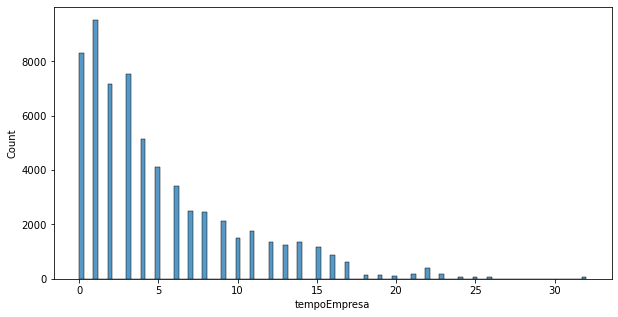

In [28]:
plt.figure(figsize=(10,5))
tt = df.loc[df.Situacao == 1, 'tempoEmpresa']
sns.histplot(tt)
plt.show()

In [29]:
# Gerando filtro para pessoas com tempo de empresa menor ou igual a oito meses completos no ano vigente.
filtro = df.tempoEmpresa <=8
df = df.loc[filtro]

In [30]:
absenteismo = df.loc[df.houve_absenteismo == 1].groupby('ChaveFuncionario')['houve_absenteismo'].count()

In [31]:
afastamentos = df.loc[df.houve_afastamento == 1].groupby('ChaveFuncionario')['houve_afastamento'].count()

In [32]:
af = pd.DataFrame(columns=['ChaveFuncionario','qtd_afastamento'])
ab = pd.DataFrame(columns=['ChaveFuncionario','qtd_absenteismo'])
af['ChaveFuncionario'] = afastamentos.index
ab['ChaveFuncionario'] = absenteismo.index
qtd_afastamento = []
qtd_absenteismo = []
for afas in afastamentos : 
    qtd_afastamento.append(afas)
for absen in absenteismo : 
    qtd_absenteismo.append(absen)
af['qtd_afastamento'] = qtd_afastamento
ab['qtd_absenteismo'] = qtd_absenteismo

In [33]:
df = df.merge(ab,how='left',on='ChaveFuncionario')

In [34]:
df = df.merge(af,how='left',on='ChaveFuncionario')

In [35]:
df.loc[df.ChaveFuncionario == '103|6153']

,ChaveFuncionario,Ano,Data,Empresa,Id_funcionario,CentroCusto,SexoFuncionario,idadeFuncionario,Qtd_dependente,DataNascimentoFuncionario,...,RecebePericulosidade,CargaHorariaFuncionario,Qtd_diasAfastamento,Hrs_absenteismo,Situacao,houve_absenteismo,houve_afastamento,tempoEmpresa,qtd_absenteismo,qtd_afastamento
35594,103|6153,2017,2017-10-28,103,6153,TI,Masculino,28,1.0,1989-11-17,...,Não Recebe,220,NaN,NaN,0.0,0.0,0.0,0.0,7.0,NaN
35595,103|6153,2017,2017-11-28,103,6153,TI,Masculino,28,1.0,1989-11-17,...,Não Recebe,220,NaN,NaN,0.0,0.0,0.0,1.0,7.0,NaN
35596,103|6153,2017,2017-12-28,103,6153,TI,Masculino,28,1.0,1989-11-17,...,Não Recebe,220,NaN,0.18333,0.0,1.0,0.0,2.0,7.0,NaN
35597,103|6153,2018,2018-01-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,Não Recebe,220,NaN,0.45000,0.0,1.0,0.0,3.0,7.0,NaN
35598,103|6153,2018,2018-02-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,Não Recebe,220,NaN,0.46667,0.0,1.0,0.0,4.0,7.0,NaN
35599,103|6153,2018,2018-03-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,Não Recebe,220,NaN,0.31667,0.0,1.0,0.0,5.0,7.0,NaN
35600,103|6153,2018,2018-04-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,Não Recebe,220,NaN,0.31667,0.0,1.0,0.0,6.0,7.0,NaN
35601,103|6153,2018,2018-05-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,Não Recebe,220,NaN,0.18333,0.0,1.0,0.0,7.0,7.0,NaN
35602,103|6153,2018,2018-06-28,103,6153,TI,Masculino,29,1.0,1989-11-17,...,Não Recebe,220,NaN,4.23333,0.0,1.0,0.0,8.0,7.0,NaN


In [36]:
ab, af

(     ChaveFuncionario  qtd_absenteismo
 0            101|5385               11
 1            101|5577               14
 2            101|5663               12
 3            101|5678                8
 4            101|5799                8
 ...               ...              ...
 4971           702|18                3
 4972           702|19                2
 4973            702|8               10
 4974            703|1                1
 4975            703|2                1
 
 [4976 rows x 2 columns],
      ChaveFuncionario  qtd_afastamento
 0            101|5886                2
 1            101|6318                2
 2            101|6413                6
 3            101|6432                3
 4            101|6435                2
 ...               ...              ...
 1272           702|15                4
 1273           702|16                2
 1274           702|17                1
 1275           702|18                3
 1276           702|19                2
 
 [1277 row

In [37]:
afastamentos

ChaveFuncionario
101|5886    2
101|6318    2
101|6413    6
101|6432    3
101|6435    2
           ..
702|15      4
702|16      2
702|17      1
702|18      3
702|19      2
Name: houve_afastamento, Length: 1277, dtype: int64

In [38]:
df.drop_duplicates(subset='ChaveFuncionario',keep='last',inplace=True)

In [39]:
df.loc[df.ChaveFuncionario == '101|6413']

,ChaveFuncionario,Ano,Data,Empresa,Id_funcionario,CentroCusto,SexoFuncionario,idadeFuncionario,Qtd_dependente,DataNascimentoFuncionario,...,RecebePericulosidade,CargaHorariaFuncionario,Qtd_diasAfastamento,Hrs_absenteismo,Situacao,houve_absenteismo,houve_afastamento,tempoEmpresa,qtd_absenteismo,qtd_afastamento
679,101|6413,2019,2019-01-28,101,6413,SESMT,Masculino,53,2.0,1966-05-12,...,Não Recebe,220,NaN,0.38333,1.0,1.0,0.0,8.0,42.0,6.0


In [40]:
df.head()

,ChaveFuncionario,Ano,Data,Empresa,Id_funcionario,CentroCusto,SexoFuncionario,idadeFuncionario,Qtd_dependente,DataNascimentoFuncionario,...,RecebePericulosidade,CargaHorariaFuncionario,Qtd_diasAfastamento,Hrs_absenteismo,Situacao,houve_absenteismo,houve_afastamento,tempoEmpresa,qtd_absenteismo,qtd_afastamento
7,101|5262,2015,2015-08-28,101,5262,SECADORES,Masculino,31,1.0,1984-02-05,...,Não Recebe,180,NaN,NaN,1.0,0.0,0.0,8.0,NaN,NaN
18,101|5385,2015,2015-11-28,101,5385,COLAGEM,Masculino,28,2.0,1987-01-15,...,Não Recebe,220,NaN,0.25,1.0,1.0,0.0,8.0,11.0,NaN
32,101|5577,2016,2016-02-28,101,5577,COLAGEM,Masculino,30,NaN,1986-06-15,...,Não Recebe,220,NaN,0.10,1.0,1.0,0.0,8.0,14.0,NaN
51,101|5663,2016,2016-07-28,101,5663,FINANCEIRO,Masculino,42,1.0,1974-07-18,...,Não Recebe,220,NaN,0.35,1.0,1.0,0.0,8.0,12.0,NaN
59,101|5678,2015,2015-08-28,101,5678,COLAGEM,Masculino,41,4.0,1974-07-07,...,Não Recebe,220,NaN,1.80,1.0,1.0,0.0,7.0,8.0,NaN


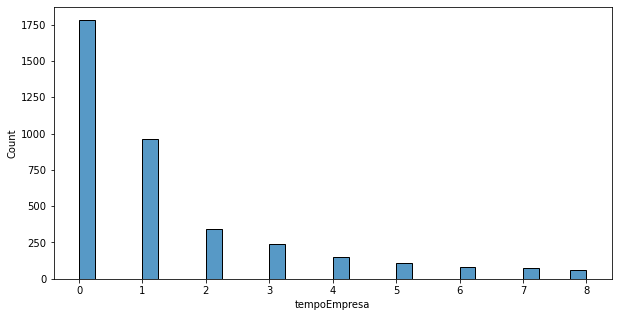

In [41]:
plt.figure(figsize=(10,5))
tt = df.loc[df.Situacao == 1, 'tempoEmpresa']
sns.histplot(tt)
plt.show()

In [42]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [43]:
df.head(40)

,ChaveFuncionario,Ano,Data,Empresa,Id_funcionario,CentroCusto,SexoFuncionario,idadeFuncionario,Qtd_dependente,DataNascimentoFuncionario,...,RecebePericulosidade,CargaHorariaFuncionario,Qtd_diasAfastamento,Hrs_absenteismo,Situacao,houve_absenteismo,houve_afastamento,tempoEmpresa,qtd_absenteismo,qtd_afastamento
0,101|5262,2015,2015-08-28,101,5262,SECADORES,Masculino,31,1.0,1984-02-05,...,Não Recebe,180,NaN,NaN,1.0,0.0,0.0,8.0,NaN,NaN
1,101|5385,2015,2015-11-28,101,5385,COLAGEM,Masculino,28,2.0,1987-01-15,...,Não Recebe,220,NaN,0.250000,1.0,1.0,0.0,8.0,11.0,NaN
2,101|5577,2016,2016-02-28,101,5577,COLAGEM,Masculino,30,NaN,1986-06-15,...,Não Recebe,220,NaN,0.100000,1.0,1.0,0.0,8.0,14.0,NaN
3,101|5663,2016,2016-07-28,101,5663,FINANCEIRO,Masculino,42,1.0,1974-07-18,...,Não Recebe,220,NaN,0.350000,1.0,1.0,0.0,8.0,12.0,NaN
4,101|5678,2015,2015-08-28,101,5678,COLAGEM,Masculino,41,4.0,1974-07-07,...,Não Recebe,220,NaN,1.800000,1.0,1.0,0.0,7.0,8.0,NaN
5,101|5799,2015,2015-10-28,101,5799,COLAGEM,Masculino,27,2.0,1988-08-20,...,Não Recebe,220,NaN,3.900000,1.0,1.0,0.0,7.0,8.0,NaN
6,101|5811,2016,2016-08-28,101,5811,COLAGEM,Masculino,36,3.0,1980-07-01,...,Não Recebe,220,NaN,NaN,1.0,0.0,0.0,8.0,12.0,NaN
7,101|5834,2015,2015-05-28,101,5834,SECADORES,Masculino,26,3.0,1989-04-15,...,Não Recebe,180,NaN,NaN,1.0,0.0,0.0,7.0,1.0,NaN
8,101|5841,2016,2016-06-28,101,5841,COLAGEM,Masculino,47,NaN,1969-06-22,...,Não Recebe,220,NaN,3.800000,1.0,1.0,0.0,8.0,18.0,NaN
9,101|5849,2015,2015-01-28,101,5849,MANUTENCAO_MEC,Masculino,34,2.0,1981-06-13,...,Não Recebe,220,NaN,0.233330,1.0,1.0,0.0,7.0,1.0,NaN


In [44]:
df.columns

Index(['ChaveFuncionario', 'Ano', 'Data', 'Empresa', 'Id_funcionario',
       'CentroCusto', 'SexoFuncionario', 'idadeFuncionario', 'Qtd_dependente',
       'DataNascimentoFuncionario', 'DataAdmissao', 'DataDesligamento',
       'EstadoCivilFuncionario', 'GrauInstrucao', 'Salario',
       'FuncionarioSindicalizado', 'RecebeInsalubridade',
       'RecebePericulosidade', 'CargaHorariaFuncionario',
       'Qtd_diasAfastamento', 'Hrs_absenteismo', 'Situacao',
       'houve_absenteismo', 'houve_afastamento', 'tempoEmpresa',
       'qtd_absenteismo', 'qtd_afastamento'],
      dtype='object')

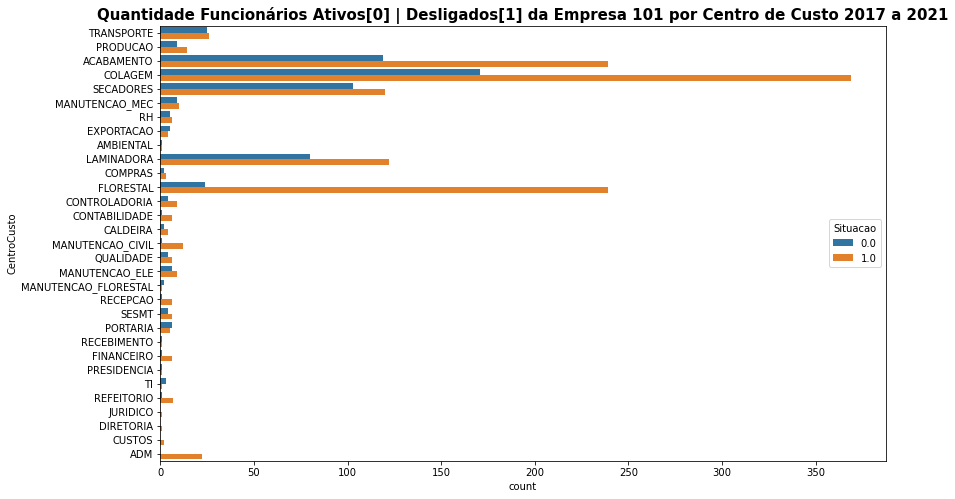

In [45]:
plt.figure(figsize=(13,8))
di = df.loc[df.Empresa == '101']
d = di[['CentroCusto','Situacao','Empresa']].sort_values(by='Situacao')
sns.countplot(data=d,y=d.CentroCusto, hue=d.Situacao, orient='h')
plt.title(f'Quantidade Funcionários Ativos[0] | Desligados[1] da Empresa 101 por Centro de Custo 2017 a 2021', fontdict={'fontsize':15,                                                                                      'fontweight':'semibold'})
plt.show()

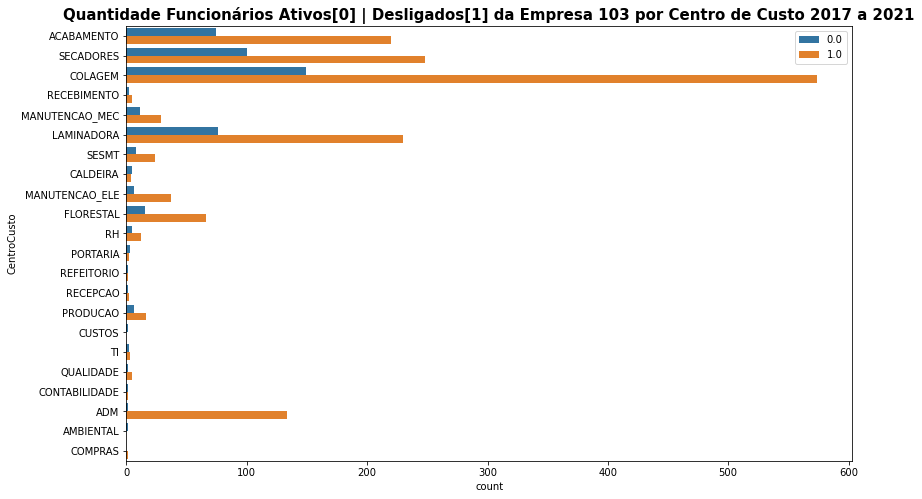

In [46]:
plt.figure(figsize=(13,8))
di = df.loc[df.Empresa == '103']
d = di[['CentroCusto','Situacao','Empresa']].sort_values(by='Situacao')
sns.countplot(data=d,y=d.CentroCusto, hue=d.Situacao, orient='h')
plt.legend(bbox_to_anchor=(1,1))
plt.title(f'Quantidade Funcionários Ativos[0] | Desligados[1] da Empresa 103 por Centro de Custo 2017 a 2021', fontdict={'fontsize':15,                                                                                      'fontweight':'semibold'})
plt.show()

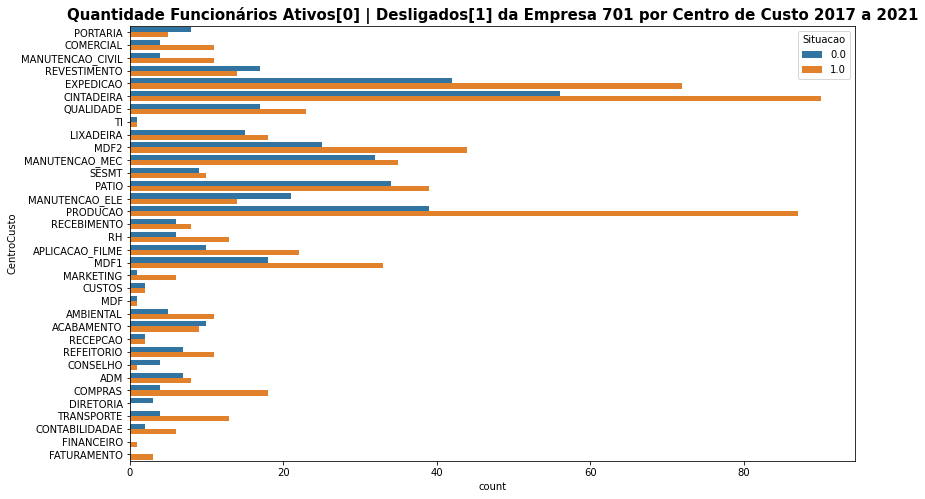

In [47]:
plt.figure(figsize=(13,8))
di = df.loc[df.Empresa == '701']
d = di[['CentroCusto','Situacao','Empresa']].sort_values(by='Situacao')
sns.countplot(data=d,y=d.CentroCusto, hue=d.Situacao, orient='h')
plt.title(f'Quantidade Funcionários Ativos[0] | Desligados[1] da Empresa 701 por Centro de Custo 2017 a 2021', fontdict={'fontsize':15,                                                                                      'fontweight':'semibold'})
plt.show()

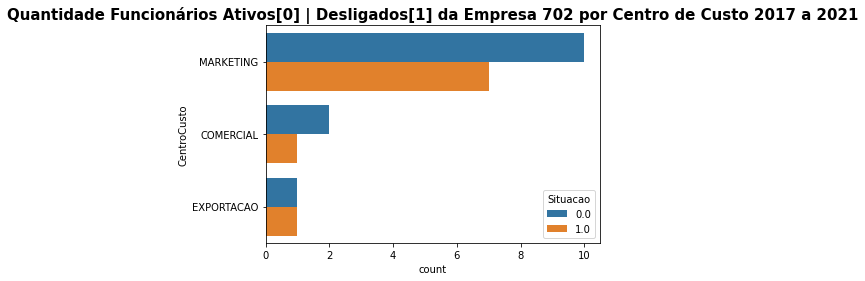

In [48]:
di = df.loc[df.Empresa == '702']
d = di[['CentroCusto','Situacao','Empresa']].sort_values(by='Situacao')
sns.countplot(data=d,y=d.CentroCusto, hue=d.Situacao, orient='h')
plt.title(f'Quantidade Funcionários Ativos[0] | Desligados[1] da Empresa 702 por Centro de Custo 2017 a 2021', fontdict={'fontsize':15,                                                                                      'fontweight':'semibold'})
plt.show()

In [100]:
data = df[['ChaveFuncionario','Empresa','SexoFuncionario','idadeFuncionario','Qtd_dependente',
          'EstadoCivilFuncionario','GrauInstrucao','Salario','FuncionarioSindicalizado',
          'RecebeInsalubridade','RecebePericulosidade','CargaHorariaFuncionario','houve_absenteismo','houve_afastamento','Situacao']]
           #'qtd_absenteismo','qtd_afastamento',

In [101]:
data.columns

Index(['ChaveFuncionario', 'Empresa', 'SexoFuncionario', 'idadeFuncionario',
       'Qtd_dependente', 'EstadoCivilFuncionario', 'GrauInstrucao', 'Salario',
       'FuncionarioSindicalizado', 'RecebeInsalubridade',
       'RecebePericulosidade', 'CargaHorariaFuncionario', 'houve_absenteismo',
       'houve_afastamento', 'Situacao'],
      dtype='object')

In [102]:
# Transformando os dados categóricos em númericos para a análise (manualmente).
cargaHoraria = {'220':0,'200':1,'180':2,'100':3,'60':4,'30':5}
data.CargaHorariaFuncionario = data.CargaHorariaFuncionario.replace(cargaHoraria)
situacao = {'Ativo':0,'Desligado_ComTurnover':1,'Desligado_SemTurnover':2}
data.Situacao = data.Situacao.replace(situacao)
sexoFuncionario = {'Masculino':0,'Feminino':1}
data.SexoFuncionario = data.SexoFuncionario.replace(sexoFuncionario)
estadoCivilFuncionario = {'Casado':0, 'Solteiro':1, 'Viúvo':2, 'Divorciado':3,
        'Separado Judicialmente':4, 'União Estável':5, 'Desquitado':6, 'Outros':7}
data.EstadoCivilFuncionario = data.EstadoCivilFuncionario.replace(estadoCivilFuncionario)
grauInstrucaoFuncionario = {'Ensino Medio Completo':6, '5ª/8ª Ensino Fundamental':3,
        '4ª completa Ensino Fundamental':2, 'Superior Completo - Pós Gradua':10,
        '4ª serie incompleta Ensino Fun':1, 'Ensino Medio Incompleto':5,
        'Ensino Fundamental Completo':4, 'Técnico':7, 'Superior Incompleto':8,
        'Analfabeto':0, 'Superior Completo':9}
data.GrauInstrucao = data.GrauInstrucao.replace(grauInstrucaoFuncionario)
funcionarioSindicalizado = {'Não Sindicalizado':0, 'Sindicalizado':1}
data.FuncionarioSindicalizado = data.FuncionarioSindicalizado.replace(funcionarioSindicalizado)
insalubre = {'Não Recebe':0, 'Recebe':1}
data.RecebeInsalubridade = data.RecebeInsalubridade.replace(insalubre)
periculosidade = {'Não Recebe':0, 'Recebe':1}
data.RecebePericulosidade = data.RecebePericulosidade.replace(periculosidade)
empresaFuncionario = {'101':0, '103':1, '201':2, '701':3, '702':4, '703':5, '705':6}
data.Empresa = data.Empresa.replace(empresaFuncionario)
dependentesFuncionario = {'-':0}
data.Qtd_dependente = data.Qtd_dependente.replace(dependentesFuncionario)

D:\ProgramFiles\Anaconda\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [103]:
data

,ChaveFuncionario,Empresa,SexoFuncionario,idadeFuncionario,Qtd_dependente,EstadoCivilFuncionario,GrauInstrucao,Salario,FuncionarioSindicalizado,RecebeInsalubridade,RecebePericulosidade,CargaHorariaFuncionario,houve_absenteismo,houve_afastamento,Situacao
0,101|5262,0,0,31,1.0,1,5,1252.68,0,0,0,180,0.0,0.0,1.0
1,101|5385,0,0,28,2.0,5,3,1551.30,0,0,0,220,1.0,0.0,1.0
2,101|5577,0,0,30,NaN,1,3,1252.68,0,0,0,220,1.0,0.0,1.0
3,101|5663,0,0,42,1.0,0,10,2708.02,0,0,0,220,1.0,0.0,1.0
4,101|5678,0,0,41,4.0,0,3,1551.30,0,0,0,220,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,702|24,4,1,25,NaN,1,9,3260.61,0,0,0,220,0.0,0.0,0.0
5339,702|25,4,0,32,1.0,0,9,4412.90,0,0,0,220,0.0,0.0,0.0
5340,703|1,5,0,35,1.0,1,9,1918.80,0,0,0,220,0.0,0.0,0.0
5341,703|2,5,0,33,3.0,0,6,2797.60,0,0,0,220,0.0,0.0,0.0


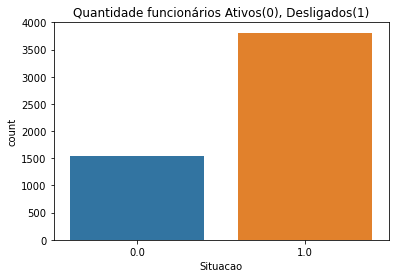

In [104]:
# Plotando um gráfico para verificar a quantidade de dados de funcionários ativos e desligados.
sns.countplot(x='Situacao',data=data)
plt.title('Quantidade funcionários Ativos(0), Desligados(1)')
plt.show()

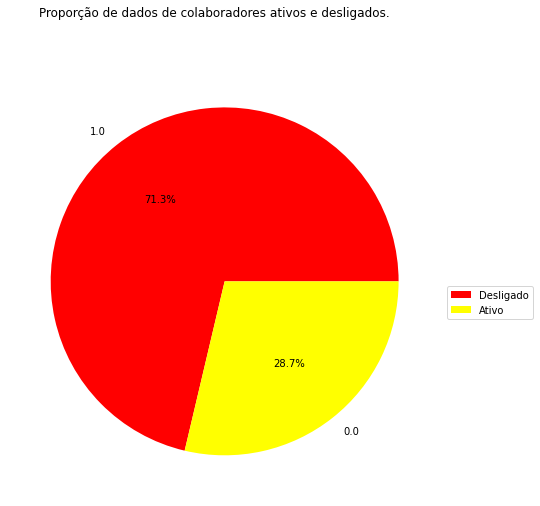

In [105]:
# Plotando a proporção de dados de Ativos|Inativos na empresa.
rotulos = data['Situacao'].value_counts().index
cores = ['red','yellow','blue']
valores = data['Situacao'].value_counts().values
plt.figure(figsize=(12,8))
plt.pie(valores,labels=rotulos,colors=cores,autopct='%1.1f%%')
plt.suptitle('Proporção de dados de colaboradores ativos e desligados.')
plt.legend(['Desligado','Ativo'],loc='best',bbox_to_anchor=(1,0.5))
plt.show()

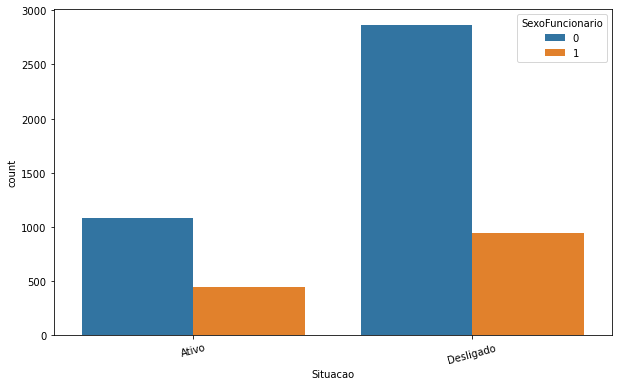

In [106]:
# Verificando a situação por gênero, onde 0 é Ativo e 1 é Desligado com menos de um ano de empresa.
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(x=data['Situacao'], hue=data['SexoFuncionario'])
ax.set_xticklabels(['Ativo','Desligado'])
plt.xticks(rotation=15)
plt.show()

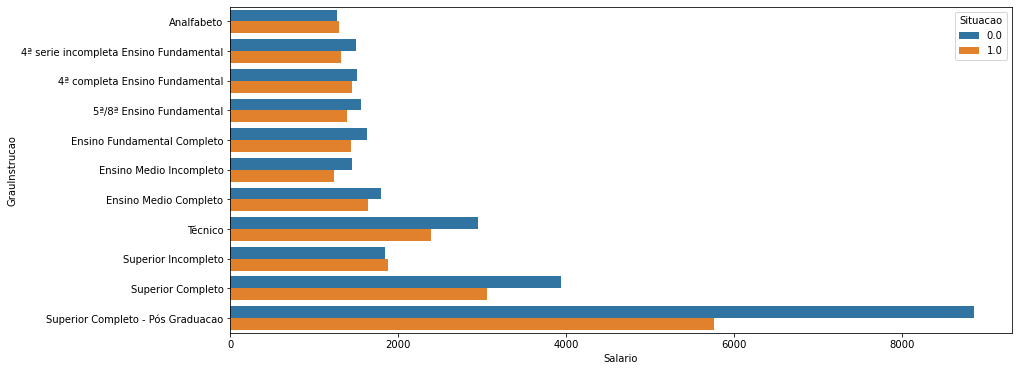

In [107]:
# Validando situação em relação ao Salário e Grau de Instrução.
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(y='GrauInstrucao',x='Salario',hue='Situacao',data=data,orient='h',ci=False)
ax.set_yticklabels(['Analfabeto','4ª serie incompleta Ensino Fundamental','4ª completa Ensino Fundamental','5ª/8ª Ensino Fundamental',
        'Ensino Fundamental Completo','Ensino Medio Incompleto','Ensino Medio Completo', 'Técnico','Superior Incompleto', 
         'Superior Completo','Superior Completo - Pós Graduacao'])
plt.show()

In [108]:
# Retirando a coluna 'ChaveFuncionario'
data.drop('ChaveFuncionario',axis=1,inplace=True)

D:\ProgramFiles\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [109]:
# Verificando as colunas
data.columns

Index(['Empresa', 'SexoFuncionario', 'idadeFuncionario', 'Qtd_dependente',
       'EstadoCivilFuncionario', 'GrauInstrucao', 'Salario',
       'FuncionarioSindicalizado', 'RecebeInsalubridade',
       'RecebePericulosidade', 'CargaHorariaFuncionario', 'houve_absenteismo',
       'houve_afastamento', 'Situacao'],
      dtype='object')

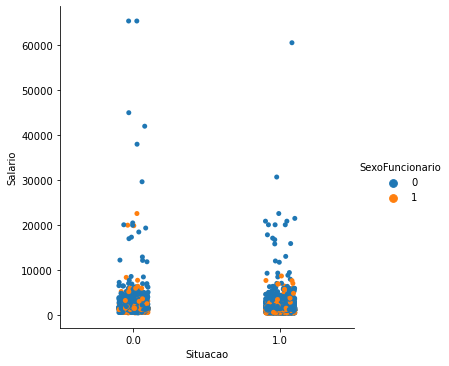

In [110]:
# Verificando Situação em relação ao Salário e Sexo do Funcionário.
sns.catplot(x='Situacao',y='Salario',hue='SexoFuncionario',data=data)
plt.show()

In [111]:
# Retirando dados nulos do dataSet.
data.fillna(0,inplace=True)

D:\ProgramFiles\Anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [112]:
# Retirando a variável alvo dos dados a serem previstos.
from sklearn.model_selection import train_test_split
X = data.drop(['Situacao'],axis=1).values
y = data.Situacao.values

In [113]:
# Usando UnderSampling e OverSampling para balancear os dados.
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
smt = SMOTE()
#rus = RandomUnderSampler()
new_X, new_y = smt.fit_resample(X,y)
#X_res, y_res = rus.fit_resample(X_treino, y_treino)

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import numpy as np
#import lazypredict
#from lazypredict.Supervised import LazyClassifier
import xgboost as xgb
SEED = 42
np.random.seed(SEED)
X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.33, random_state=SEED)
X_train, X_test, y_train, y_test = train_test_split(new_X,new_y,test_size=0.33,random_state=SEED)

D:\ProgramFiles\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


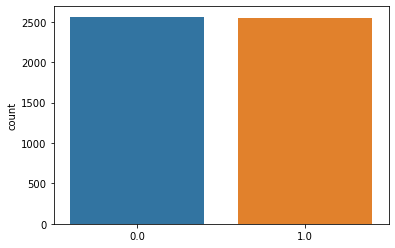

In [115]:
# Verificando o balanceamento depois de efetuar SMOTE entre a variável 'Situacao'.
sns.countplot(y_train)
plt.show()

D:\ProgramFiles\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

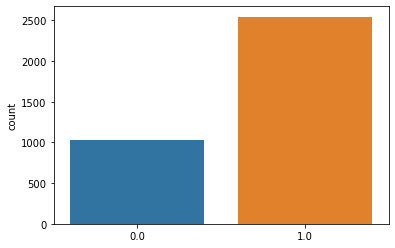

In [116]:
sns.countplot(y_treino)

In [117]:
# Usando KFold para a mistura dos dados de treino . 
#cv = KFold(n_splits=5,shuffle=True)

In [118]:
# Passando e treinando os modelos de Machine Learning . 
modelo_svc = SVC()
modeloFlorestaAleatoria = RandomForestClassifier(n_estimators=3)
modeloArvoreDecisao = DecisionTreeClassifier(max_depth=2)
modeloRegressaoLogistica = LogisticRegression(solver='liblinear',max_iter=50)
modeloNaiveBayes = GaussianNB()
modeloXGB = xgb.XGBClassifier(use_label_encoder=False,eval_metric='rmse')
modelosTeste = [modeloRegressaoLogistica, modeloFlorestaAleatoria, modeloArvoreDecisao, modeloNaiveBayes, modelo_svc, modeloXGB]
nome = ['Regressão Logística', 
         'Floresta Aleatória','Arvore Decisão','Naive Bayes','Modelo SVC','Árvore Decisão Reforço de Gradiente']
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
cont = 0
for item in modelosTeste:
    
    resultados = cross_val_score(item, X, y, cv = cv, 
                              scoring = 'accuracy')
    #resultados = cross_val_score(item, X_train, y_train, cv = cv, 
    #                          scoring = 'accuracy')
    media = resultados.mean()
    desvioPadrao = resultados.std()
    print('Acurácia média - Modelo {}: {:.2f}%'
          .format(nome[cont], media*100))
    print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'
           .format(nome[cont], 
                  (media - 2*desvioPadrao)*100, (media + 2*desvioPadrao)*100))
    cont += 1

Acurácia média - Modelo Regressão Logística: 73.59%
Intervalo de acurácia - Modelo Regressão Logística: [72.14% ~ 75.04%]

Acurácia média - Modelo Floresta Aleatória: 75.39%
Intervalo de acurácia - Modelo Floresta Aleatória: [73.70% ~ 77.08%]

Acurácia média - Modelo Arvore Decisão: 75.03%
Intervalo de acurácia - Modelo Arvore Decisão: [73.46% ~ 76.61%]

Acurácia média - Modelo Naive Bayes: 70.47%
Intervalo de acurácia - Modelo Naive Bayes: [69.33% ~ 71.60%]

Acurácia média - Modelo Modelo SVC: 71.21%
Intervalo de acurácia - Modelo Modelo SVC: [71.03% ~ 71.39%]

Acurácia média - Modelo Árvore Decisão Reforço de Gradiente: 79.60%
Intervalo de acurácia - Modelo Árvore Decisão Reforço de Gradiente: [77.32% ~ 81.88%]



In [119]:
# Passando e treinando os modelos de Machine Learning . 
modelo_svc = SVC()
modeloFlorestaAleatoria = RandomForestClassifier(n_estimators=3)
modeloArvoreDecisao = DecisionTreeClassifier(max_depth=2)
modeloRegressaoLogistica = LogisticRegression(solver='liblinear',max_iter=50)
modeloNaiveBayes = GaussianNB()
modeloXGB = xgb.XGBClassifier(use_label_encoder=False,eval_metric='rmse')
modelosTeste = [modeloRegressaoLogistica, modeloFlorestaAleatoria, modeloArvoreDecisao, modeloNaiveBayes, modelo_svc, modeloXGB]
nome = ['Regressão Logística', 
         'Floresta Aleatória','Arvore Decisão','Naive Bayes','Modelo SVC','Árvore Decisão Reforço de Gradiente']
np.random.seed(SEED)
# Executando o Cross Validation
cv = KFold(n_splits = 5, shuffle = True)
cont = 0
for item in modelosTeste:
    
    resultados = cross_val_score(item, X, y, cv = cv, 
                              scoring = 'accuracy')
    media = resultados.mean()
    desvioPadrao = resultados.std()
    print('Acurácia média - Modelo {}: {:.2f}%'
          .format(nome[cont], media*100))
    print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'
           .format(nome[cont], 
                  (media - 2*desvioPadrao)*100, (media + 2*desvioPadrao)*100))
    cont += 1

Acurácia média - Modelo Regressão Logística: 73.14%
Intervalo de acurácia - Modelo Regressão Logística: [70.59% ~ 75.70%]

Acurácia média - Modelo Floresta Aleatória: 75.48%
Intervalo de acurácia - Modelo Floresta Aleatória: [72.60% ~ 78.37%]

Acurácia média - Modelo Arvore Decisão: 75.09%
Intervalo de acurácia - Modelo Arvore Decisão: [72.40% ~ 77.78%]

Acurácia média - Modelo Naive Bayes: 70.50%
Intervalo de acurácia - Modelo Naive Bayes: [67.48% ~ 73.53%]

Acurácia média - Modelo Modelo SVC: 71.10%
Intervalo de acurácia - Modelo Modelo SVC: [68.66% ~ 73.54%]

Acurácia média - Modelo Árvore Decisão Reforço de Gradiente: 80.24%
Intervalo de acurácia - Modelo Árvore Decisão Reforço de Gradiente: [78.51% ~ 81.96%]



Feature_num:0 | Nome_feature: Empresa | Feature_importance :  3.90%
Feature_num:1 | Nome_feature: SexoFuncionario | Feature_importance :  12.55%
Feature_num:2 | Nome_feature: idadeFuncionario | Feature_importance :  2.81%
Feature_num:3 | Nome_feature: Qtd_dependente | Feature_importance :  5.85%
Feature_num:4 | Nome_feature: EstadoCivilFuncionario | Feature_importance :  7.02%
Feature_num:5 | Nome_feature: GrauInstrucao | Feature_importance :  6.15%
Feature_num:6 | Nome_feature: Salario | Feature_importance :  8.17%
Feature_num:7 | Nome_feature: FuncionarioSindicalizado | Feature_importance :  7.88%
Feature_num:8 | Nome_feature: RecebeInsalubridade | Feature_importance :  1.98%
Feature_num:9 | Nome_feature: RecebePericulosidade | Feature_importance :  5.16%
Feature_num:10 | Nome_feature: CargaHorariaFuncionario | Feature_importance :  3.15%
Feature_num:11 | Nome_feature: houve_absenteismo | Feature_importance :  29.65%
Feature_num:12 | Nome_feature: houve_afastamento | Feature_importan

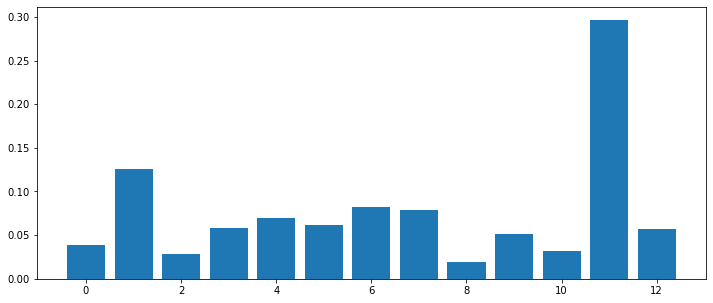

In [122]:
# Calculando a importância das features para auxiliar na engenharia de recursos.
#modeloXGB.fit(X_treino,y_treino,eval_metric='rmse')
modeloXGB.fit(X_train,y_train,eval_metric='rmse')
importancia = modeloXGB.feature_importances_
for i,v in enumerate(importancia):
    nome = data.columns[i]
    print('Feature_num:{} | Nome_feature: {} | Feature_importance :  {:.2f}%'.format(i,nome,v*100))
# Plotando a Feature importance
plt.figure(figsize=(12,5))
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

In [91]:
# Criando função para determinar a precisão do modelo.
def intervalo_precisao(resultados):
    media = resultados.mean()
    desvioPadrao = resultados.std()
    print('Precisão média: {:.2f}%'.format(media*100))
    print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'
          .format((media - 2*desvioPadrao)*100, (media + 2*desvioPadrao)*100))
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
modeloFlorestaAleatoria = RandomForestClassifier(n_estimators=3)
#resultados = cross_val_score(modeloFlorestaAleatoria, X_treino, y_treino, cv = cv, 
                          #scoring='precision_weighted')
resultados = cross_val_score(modeloFlorestaAleatoria, X, y, cv = cv, 
                          scoring='precision_weighted')
intervalo_precisao(resultados)

Precisão média: 80.26%
Intervalo de Precisão: [76.93% ~ 83.58%]


In [92]:
# Criando função para determinar o Recall do modelo.
def intervalo_precisao(resultados):
    media = resultados.mean()
    desvioPadrao = resultados.std()
    print('Recall médio: {:.2f}%'.format(media*100))
    print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'
          .format((media - 2*desvioPadrao)*100, (media + 2*desvioPadrao)*100))
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
modeloFlorestaAleatoria = RandomForestClassifier(n_estimators=3)
#resultados = cross_val_score(modeloFlorestaAleatoria, X_treino, y_treino, cv = cv, 
#                          scoring='recall')
resultados = cross_val_score(modeloFlorestaAleatoria, X_train, y_train, cv = cv, 
                          scoring='recall')
intervalo_precisao(resultados)

Recall médio: 85.21%
Intervalo de Recall: [82.94% ~ 87.49%]


In [93]:
# Criando função para determinar a precisão do modelo.
def intervalo_precisao(resultados):
    media = resultados.mean()
    desvioPadrao = resultados.std()
    print('Precisão média: {:.2f}%'.format(media*100))
    print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'
          .format((media - 2*desvioPadrao)*100, (media + 2*desvioPadrao)*100))
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
modeloXGB = xgb.XGBClassifier(use_label_encoder=False,eval_metric='rmse')
#resultados = cross_val_score(modeloXGB, X_treino, y_treino, cv = cv, 
#                          scoring='precision_weighted')
resultados = cross_val_score(modeloXGB, X_train, y_train, cv = cv, 
                          scoring='precision_weighted')
intervalo_precisao(resultados)

Precisão média: 90.21%
Intervalo de Precisão: [88.91% ~ 91.50%]


In [94]:
# Criando função para determinar a Recall do modelo.
def intervalo_precisao(resultados):
    media = resultados.mean()
    desvioPadrao = resultados.std()
    print('Recall médio: {:.2f}%'.format(media*100))
    print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'
          .format((media - 2*desvioPadrao)*100, (media + 2*desvioPadrao)*100))
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
modeloXGB = xgb.XGBClassifier(use_label_encoder=False,eval_metric='rmse')
#resultados = cross_val_score(modeloXGB, X_treino, y_treino, cv = cv, 
#                          scoring='recall')
resultados = cross_val_score(modeloXGB, X, y, cv = cv, 
                          scoring='recall')
intervalo_precisao(resultados)

Recall médio: 90.03%
Intervalo de Recall: [89.07% ~ 90.98%]


In [95]:
X_train.size, y_train.size

(76575, 5105)

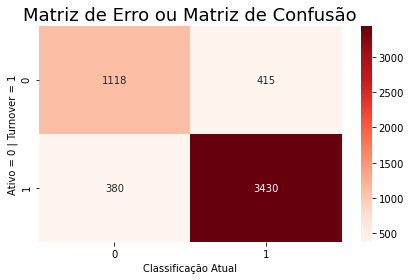

In [96]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = xgb.XGBClassifier(use_label_encoder=False,eval_metric='rmse')
#y_pred = cross_val_predict(model, X_treino, y_treino, cv = cv)
y_pred = cross_val_predict(model, X, y, cv = cv)
fig, ax = plt.subplots()
#sns.heatmap(confusion_matrix(y_treino, y_pred), annot=True, 
#            ax=ax, fmt='d', cmap='Reds')
sns.heatmap(confusion_matrix(y, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Erro ou Matriz de Confusão", fontsize=18)
ax.set_ylabel("Ativo = 0 | Turnover = 1")
ax.set_xlabel("Classificação Atual")
plt.tight_layout()

In [97]:
y.size, y_pred.size

(5343, 5343)

In [98]:
# Validando os melhores hiperparâmetros para o modelo.
#from sklearn.model_selection import RandomizedSearchCV
#params = { 'max_depth': [3, 5, 6, 10, 15, 20],
#          'learning_rate': [0.01, 0.1, 0.2, 0.3],
#           'subsample': np.arange(0.5, 1.0, 0.1),
#           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
#           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
#           'n_estimators': [100, 500, 1000]}
#xgbr = xgb.XGBRegressor(seed = 20)
#clf = RandomizedSearchCV(estimator=xgbr,
#                         param_distributions=params,
#                         scoring='neg_mean_squared_error',
#                         n_iter=25,
#                         verbose=1)
#clf.fit(X_train, y_train)
#print("Melhores parâmetros:", clf.best_params_)
#print("Mais baixo Erro Quadrático Médio: ", (-clf.best_score_)**(1/2.0))

In [99]:
modelo_final = xgb.XGBClassifier(random_state=SEED,max_depth=10,learning_rate=0.1,subsample=0.7,n_estimators=1000,
                                colsample_bytree=0.7,colsample_bylevel=0.7,use_label_encoder=False,eval_metric='rmse')
#modelo_final.fit(X_treino, y_treino)
modelo_final.fit(X_treino, y_treino)
#y_pred = modelo_final.predict(X_teste)
y_pred = modelo_final.predict(X_test)
# imprimindo relatório de classificação
print("Relatório de Classificação:\n", 
       classification_report(y_test, y_pred, digits=2))

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.93      0.84      0.89      1248
         1.0       0.86      0.94      0.90      1267

    accuracy                           0.89      2515
   macro avg       0.90      0.89      0.89      2515
weighted avg       0.89      0.89      0.89      2515



In [76]:
#import joblib
#joblib.dump(modelo_final, 'modeloXGB_final_.pkl')